In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [76]:
train = pd.read_csv('./data/train_V2.csv')

In [78]:
pd.options.display.max_columns = None
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [85]:
train.groupby('matchType').size()

matchType
crashfpp               6287
crashtpp                371
duo                  313591
duo-fpp              996691
flarefpp                718
flaretpp               2505
normal-duo              199
normal-duo-fpp         5489
normal-solo             326
normal-solo-fpp        1682
normal-squad            516
normal-squad-fpp      17174
solo                 181943
solo-fpp             536762
squad                626526
squad-fpp           1756186
dtype: int64

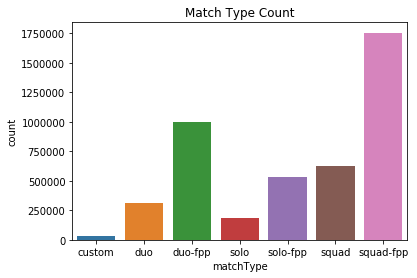

In [87]:
data = train.copy()
data.loc[~data['matchType'].isin(['solo','duo','squad','solo-fpp','duo-fpp','squad-fpp'])] = 'custom'
sns.countplot(data['matchType'].sort_values())
plt.title("Match Type Count")
plt.show()

In [88]:
train.groupby('matchType').mean()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,,,,,
crashfpp,0.191824,1.131223,90.026153,0.452839,0.075553,1.207253,44.945920,0.000000,0.779068,0.516781,4.470438,892.842691,46.963417,44.183394,1500.000000,0.058374,1890.569417,0.312868,1.543515,0.073167,0.078098,669.118930,1.518530,0.000000,0.474711
crashtpp,0.242588,1.105121,101.932507,0.479784,0.056604,0.940701,38.417790,0.000000,0.881402,0.576819,5.540457,897.873315,38.862534,36.822102,1500.000000,0.029650,1302.812062,0.366577,0.294717,0.037736,0.067385,724.213005,1.665768,0.000000,0.484515
duo,0.213676,1.133486,126.321987,0.610553,0.212576,1.338989,47.408660,443.144156,0.907966,0.545258,22.210025,1646.611606,47.684768,45.575386,924.626970,0.151879,752.369869,0.004260,4.811171,0.026187,0.010431,1123.632484,3.719144,578.095701,0.482777
duo-fpp,0.215806,1.078022,132.249549,0.628594,0.225009,1.328823,47.638865,485.647968,0.926086,0.566743,22.375703,1578.642465,47.719569,46.018668,918.925386,0.161866,546.374125,0.002020,4.178059,0.019369,0.005852,1104.370561,3.564324,592.193722,0.485801
flarefpp,0.278552,1.316156,138.440877,0.891365,0.204735,1.835655,41.564067,0.000000,0.885794,0.543175,25.112597,1885.945682,23.842618,22.987465,1500.000000,0.232591,1323.506787,0.008357,3.023554,0.044568,0.022284,1497.557684,4.473538,0.000000,0.451455
flaretpp,0.284232,1.364471,128.363314,0.857086,0.192016,1.840719,44.145709,113.373253,0.857485,0.505788,26.594342,1872.002794,25.227545,24.227146,1329.826747,0.235130,1610.638180,0.010778,6.772103,0.054691,0.031138,1442.506558,4.346108,170.059880,0.434591
normal-duo,1.155779,1.075377,441.994427,2.457286,0.924623,2.758794,10.713568,663.316583,3.829146,0.944724,53.324189,1272.507538,10.432161,10.241206,504.422111,0.371859,1351.141709,0.030151,0.937136,0.035176,0.020101,1212.131744,10.633166,994.974874,0.514656
normal-duo-fpp,0.609583,1.688832,253.990259,0.877209,0.472946,2.305338,25.502459,673.346693,1.956094,0.682456,38.635432,1704.422481,25.862088,25.682091,489.309346,0.177446,1757.459888,0.009656,7.500335,0.021133,0.017672,1618.029235,6.672254,1010.020040,0.508175
normal-solo,1.745399,0.809816,799.843804,0.000000,1.920245,2.466258,10.684049,677.914110,7.509202,1.377301,83.867813,1199.855828,18.751534,13.107362,482.450920,0.000000,399.189390,0.000000,1.980368,0.073620,0.000000,939.345172,18.279141,1016.871166,0.561912


In [74]:
df_tpp = df[(df['matchType'].isin(['solo','duo','squad']))].reset_index()

In [75]:
df_tpp.groupby('matchType').describe()

DBNOs                                                 assists  \
              count      mean       std  min  25%  50%  75%   max     count   
matchType                                                                     
duo        313591.0  0.610553  0.965529  0.0  0.0  0.0  1.0  31.0  313591.0   
solo       181943.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  181943.0   
squad      626526.0  0.854052  1.321197  0.0  0.0  0.0  1.0  32.0  626526.0   

                                                           boosts            \
               mean       std  min  25%  50%  75%   max     count      mean   
matchType                                                                     
duo        0.213676  0.536297  0.0  0.0  0.0  0.0   8.0  313591.0  1.133486   
solo       0.055616  0.245147  0.0  0.0  0.0  0.0   4.0  181943.0  1.066048   
squad      0.289891  0.652877  0.0  0.0  0.0  0.0  10.0  626526.0  1.175439   

                                              damageDealt              \
                std  min  25%  50%  75%   max       count        mean   
matchType                                                               
duo        1.769551  0.0  0.0  0.0  2.0  19.0    313591.0  126.321987   
solo       1.825299  0.0  0.0  0.0  2.0  24.0    181943.0  112.615132   
squad      1.746100  0.0  0.0  0.0  2.0  20.0    626526.0  127.600206   

                                                       headshotKills  \
                  std  min  25%     50%    75%     max         count   
matchType                                                              
duo        167.128966  0.0  0.0  78.650  180.4  2333.0      313591.0   
solo       159.219277  0.0  0.0  65.730  159.6  2490.0      181943.0   
squad      170.720937  0.0  0.0  79.355  180.8  3796.0      626526.0   

                                                            heals            \
               mean       std  min  25%  50%  75%   max     count      mean   
matchType                                                                     
duo        0.212576  0.592413  0.0  0.0  0.0  0.0  17.0  313591.0  1.338989   
solo       0.223823  0.635332  0.0  0.0  0.0  0.0  19.0  181943.0  1.012130   
squad      0.212073  0.604463  0.0  0.0  0.0  0.0  26.0  626526.0  1.508456   

                                                  index                \
                std  min  25%  50%  75%   max     count          mean   
matchType                                                               
duo        2.642116  0.0  0.0  0.0  1.0  62.0  313591.0  2.226904e+06   
solo       2.445998  0.0  0.0  0.0  1.0  49.0  181943.0  2.218709e+06   
squad      2.842145  0.0  0.0  0.0  2.0  80.0  626526.0  2.221836e+06   

                                                                           \
                    std   min        25%        50%        75%        max   
matchType                                                                   
duo        1.283554e+06   2.0  1118492.5  2226375.0  3337437.0  4446955.0   
solo       1.284324e+06  36.0  1103679.5  2218250.0  3332992.0  4446962.0   
squad      1.284553e+06   8.0  1107392.0  2222156.5  3334127.5  4446952.0   

          killPlace                                                      \
              count       mean        std  min   25%   50%   75%    max   
matchType                                                                 
duo        313591.0  47.408660  27.230830  1.0  24.0  47.0  71.0  100.0   
solo       181943.0  46.172224  28.002309  1.0  21.0  46.0  70.0  100.0   
squad      626526.0  47.690383  27.360136  1.0  24.0  48.0  71.0  100.0   

          killPoints                                                         \
               count        mean         std  min  25%  50%     75%     max   
matchType                                                                     
duo         313591.0  443.144156  569.591462  0.0  0.0  0.0  1060.0  1967.0   
solo        181943.0  407.839994  557.630996  0.

In [20]:
df_tpp['is_first'] = np.where(df_tpp['winPlacePerc']==1,1,0)

In [23]:
df_tpp.groupby('is_first').describe()

DBNOs                                                  assists  \
              count      mean       std  min  25%  50%  75%   max      count   
is_first                                                                       
0         1089298.0  0.605772  1.071704  0.0  0.0  0.0  1.0  31.0  1089298.0   
1           32762.0  2.035407  2.299982  0.0  0.0  1.0  3.0  32.0    32762.0   

                                                           boosts            \
              mean       std  min  25%  50%  75%   max      count      mean   
is_first                                                                      
0         0.205141  0.528742  0.0  0.0  0.0  0.0   8.0  1089298.0  1.062268   
1         1.077163  1.201920  0.0  0.0  1.0  2.0  10.0    32762.0  3.929186   

                                             damageDealt              \
               std  min  25%  50%  75%   max       count        mean   
is_first                                                               
0         1.667980  0.0  0.0  0.0  2.0  24.0   1089298.0  116.379242   
1         2.520086  0.0  2.0  4.0  6.0  19.0     32762.0  405.229981   

                                                         headshotKills  \
                 std  min    25%    50%      75%     max         count   
is_first                                                                 
0         152.557422  0.0    0.0   74.0  169.100  3407.0     1089298.0   
1         334.196962  0.0  156.7  332.3  570.675  3796.0       32762.0   

                                                            heals            \
              mean       std  min  25%  50%  75%   max      count      mean   
is_first                                                                      
0         0.191089  0.538284  0.0  0.0  0.0  0.0  17.0  1089298.0  1.324546   
1         0.979824  1.533323  0.0  0.0  0.0  1.0  26.0    32762.0  3.244826   

                                                  index                \
               std  min  25%  50%  75%   max      count          mean   
is_first                                                                
0         2.683106  0.0  0.0  0.0  1.0  80.0  1089298.0  2.222773e+06   
1         3.558608  0.0  1.0  2.0  5.0  44.0    32762.0  2.221816e+06   

                                                                            \
                   std    min         25%        50%        75%        max   
is_first                                                                     
0         1.284353e+06    2.0  1109712.25  2222682.5  3335199.0  4446962.0   
1         1.280452e+06  107.0  1113501.75  2222662.5  3324413.5  4446772.0   

          killPlace                                                      \
              count       mean        std  min   25%   50%   75%    max   
is_first                                                                  
0         1089298.0  48.428624  27.045295  1.0  25.0  49.0  72.0  100.0   
1           32762.0  12.017093  13.068379  1.0   2.0   6.0  19.0   57.0   

         killPoints                                                         \
              count        mean         std  min  25%  50%     75%     max   
is_first                                                                     
0         1089298.0  465.776280  592.469613  0.0  0.0  0.0  1099.0  2075.0   
1           32762.0  517.687656  664.663419  0.0  0.0  0.0  1238.0  2063.0   

         killStreaks                                                    kills  \
               count      mean       std  min  25%  50%  75%   max      count   
is_first                                                                        
0          1089298.0  0.499505  0.682612  0.0  0.0  0.0  1.0  16.0  1089298.0   
1            32762.0  1.264605  0.834403  0.0  1.0  1.0  2.0  18.0    32762.0   

                                                       longestKill             \
              mean       std  min  25%  50%  75%   max       count       mean 

In [24]:
df['player_attr'] = np.where(df['winPlacePerc'] == 1,1,
                             np.where(df['winPlacePerc'] > 0.75,2,
                             np.where(df['winPlacePerc'] > 0.5,3,
                             np.where(df['winPlacePerc'] >0.25,4,
                             np.where(df['winPlacePerc'] >=0,5,None)))))


In [26]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,player_attr
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,3
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,5
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,5


In [30]:
df_tpp.groupby('player_attr').mean()

,index,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
player_attr,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.221816e+06,1.077163,3.929186,405.229981,2.035407,0.979824,3.244826,12.017093,517.687656,3.526403,1.264605,99.085654,1621.755265,35.061260,33.296624,940.771534,0.459313,1815.023331,0.012453,10.551800,0.008913,0.041542,2770.644977,5.671052,599.263415,1.000000
2,2.222184e+06,0.457152,2.839818,222.229871,1.036878,0.425202,3.068639,23.692366,482.287749,1.735745,0.865060,52.359332,1629.584555,45.591348,43.810588,915.813582,0.305365,1585.528862,0.009672,13.407528,0.026364,0.022901,2451.740633,5.369707,597.664288,0.871402
3,2.226234e+06,0.235271,1.401243,132.367753,0.688947,0.217128,1.957167,36.827070,467.957926,0.937943,0.595941,25.626686,1627.127587,45.203055,43.497522,908.550268,0.197039,1190.276356,0.007200,6.897085,0.036736,0.015480,1661.740804,4.832005,591.088820,0.630725
4,2.224672e+06,0.140315,0.504466,93.083359,0.525582,0.134816,0.801259,50.228988,462.909942,0.606857,0.443846,11.578605,1627.354864,44.586817,42.894759,906.290131,0.118027,456.448079,0.004064,1.918102,0.039340,0.006742,745.639551,3.680607,585.903814,0.376763
5,2.219492e+06,0.069154,0.093401,54.195251,0.329901,0.063156,0.159061,70.795382,455.720833,0.284214,0.239528,3.533971,1631.576079,41.219276,39.289891,894.993155,0.038937,51.889621,0.001444,0.407677,0.019061,0.001258,189.204703,1.910781,576.033658,0.105026


In [35]:
len(df[(df['winPlacePerc']>=0.95) & (df['winPlacePerc']<1)])

165306

In [33]:
len(df[(df['winPlacePerc']==1)])

127573

In [36]:
df_tpp_top = df_tpp[df_tpp['winPlacePerc']>=0.95]

In [38]:
df_tpp_top['is_first'] = np.where(df_tpp_top['winPlacePerc']==1,1,0)

/Users/alexhuo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_tpp_top.groupby('is_first').mean()

,index,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
is_first,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.222456e+06,0.645956,3.757911,306.728113,1.321222,0.617991,3.418510,17.110128,493.397278,2.467875,1.044797,71.825378,1629.895114,45.656055,43.858300,921.284794,0.380446,1731.437729,0.010869,13.916212,0.018900,0.028590,2662.460407,5.516928,601.427479,0.96599
1,2.221816e+06,1.077163,3.929186,405.229981,2.035407,0.979824,3.244826,12.017093,517.687656,3.526403,1.264605,99.085654,1621.755265,35.061260,33.296624,940.771534,0.459313,1815.023331,0.012453,10.551800,0.008913,0.041542,2770.644977,5.671052,599.263415,1.00000


In [46]:
df_tpp_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74350 entries, 3 to 1122052
Data columns (total 32 columns):
index              74350 non-null int64
Id                 74350 non-null object
groupId            74350 non-null object
matchId            74350 non-null object
assists            74350 non-null int64
boosts             74350 non-null int64
damageDealt        74350 non-null float64
DBNOs              74350 non-null int64
headshotKills      74350 non-null int64
heals              74350 non-null int64
killPlace          74350 non-null int64
killPoints         74350 non-null int64
kills              74350 non-null int64
killStreaks        74350 non-null int64
longestKill        74350 non-null float64
matchDuration      74350 non-null int64
matchType          74350 non-null object
maxPlace           74350 non-null int64
numGroups          74350 non-null int64
rankPoints         74350 non-null int64
revives            74350 non-null int64
rideDistance       74350 non-null float64

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_tpp_top_pca = df_tpp_top.select_dtypes(include=numerics)

In [50]:
# Standardizing the features
df_tpp_top_pca= StandardScaler().fit_transform(df_tpp_top_pca)

In [60]:
df_tpp_top_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74350 entries, 3 to 1122052
Data columns (total 27 columns):
index              74350 non-null int64
assists            74350 non-null int64
boosts             74350 non-null int64
damageDealt        74350 non-null float64
DBNOs              74350 non-null int64
headshotKills      74350 non-null int64
heals              74350 non-null int64
killPlace          74350 non-null int64
killPoints         74350 non-null int64
kills              74350 non-null int64
killStreaks        74350 non-null int64
longestKill        74350 non-null float64
matchDuration      74350 non-null int64
maxPlace           74350 non-null int64
numGroups          74350 non-null int64
rankPoints         74350 non-null int64
revives            74350 non-null int64
rideDistance       74350 non-null float64
roadKills          74350 non-null int64
swimDistance       74350 non-null float64
teamKills          74350 non-null int64
vehicleDestroys    74350 non-null int64
w

In [53]:
pca = PCA(n_components=5)
pca.fit(df_tpp_top_pca)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
array = df_tpp_top_pca.values
X = array[:,1:24]
Y = array[:,26]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: %d


TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [72]:
df_tpp_top_pca.columns[1:24][fit.support_]

#fit.support_

Index(['assists', 'headshotKills', 'kills', 'killStreaks', 'teamKills'], dtype='object')